# Installation

In [1]:
!pip install pandas
!pip install opencv-python==4.6.0.66
!pip install seaborn
!pip install scikit-learn

# Import

In [2]:
import numpy as np
import pandas as pd 


import os
for dirname, _, filenames in os.walk('C:/Users/Admin/Downloads/Thesis Code/AutismDataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import random
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models, Sequential
from tensorflow.keras import optimizers

from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0001.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0002.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0003.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0004.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0005.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0006.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0007.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0008.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0009.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0010.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0011.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0012.jpg
C:/Users/Admin/D

C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.0.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.1.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.10.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.100.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.1000.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.1001.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.1002.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.1003.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.1004.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.1005.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.1006.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.1007.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.1008.jpg
C:/Users/Admin/Downloads/Thesis Co

ModuleNotFoundError: No module named 'keras.layers.core'

# Train & Test Directories 

In [3]:
train_data = "C:/Users/Admin/Downloads/Thesis Code/AutismDataset/train"
test_data = "C:/Users/Admin/Downloads/Thesis Code/AutismDataset/test"

# Splitting Autistic & Non-Autistic

In [4]:
train_non_autistic = []
train_autistic = []

for i in os.listdir(train_data):
    if 'Non_Autistic' in i:
        train_non_autistic.append(os.path.join(train_data, i))
    else:
        train_autistic.append(os.path.join(train_data, i))

test_non_autistic = []
test_autistic = []

for i in os.listdir(test_data):
    if 'Non_Autistic' in i:
        test_non_autistic.append(os.path.join(test_data, i))
    else:
        test_autistic.append(os.path.join(test_data, i))

In [5]:
train_imgs = train_autistic + train_non_autistic
random.shuffle(train_imgs)

In [6]:
test_imgs = test_autistic + test_non_autistic
random.shuffle(test_imgs)

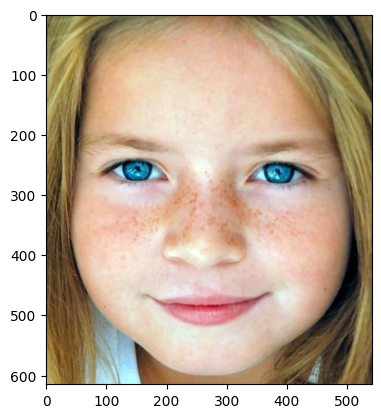

In [7]:
import matplotlib.image as mpimg
for ima in train_imgs[0:1]:
    img=mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

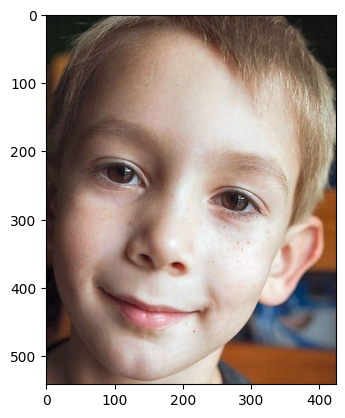

In [8]:
import matplotlib.image as mpimg
for ima in test_imgs[0:1]:
    img=mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

# Resizing The Images

In [9]:
def read_and_process_image(list_of_images):
    X = []
    y = []
    
    for image_path in list_of_images:
        # Read and resize the image
        img = cv2.resize(cv2.imread(image_path, cv2.IMREAD_COLOR), (224, 224), interpolation=cv2.INTER_CUBIC)
        
        if 'Non_Autistic' in image_path:
            y.append(0)
        else:
            y.append(1)
            
    return X, y

X_train, y_train = read_and_process_image(train_imgs)
X_test, y_test = read_and_process_image(test_imgs)


# Validation Data

In [10]:
val_autistic = "/Users/Admin/Downloads/Thesis Code/AutismDataset/valid/Autistic"
val_non_autistic = "/Users/Admin/Downloads/Thesis Code/AutismDataset/valid/Non_Autistic"
val_autistic_imgs = ["/Users/Admin/Downloads/Thesis Code/AutismDataset/valid/Autistic/{}".format(i) for i in os.listdir(val_autistic)]
val_non_autistic_imgs = ["/Users/Admin/Downloads/Thesis Code/AutismDataset/valid/Non_Autistic/{}".format(i) for i in os.listdir(val_non_autistic)]
val_imgs = val_autistic_imgs + val_non_autistic_imgs
random.shuffle(val_imgs)

In [11]:
X_val, y_val = read_and_process_image(val_imgs)

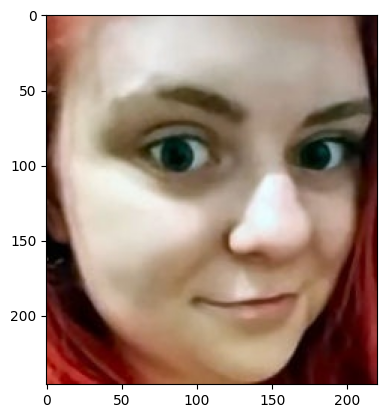

In [12]:
import matplotlib.image as mpimg
for ima in val_imgs[0:1]:
    img=mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

# Preprocessing 

In [13]:
def preprocess_image(train_data, target_size=(224, 224)):
    # Read the image
    image = cv2.imread(train_data, cv2.IMREAD_COLOR)
    
    # Resize the image
    if target_size:
        image = cv2.resize(image, target_size, interpolation=cv2.INTER_CUBIC)
    
    # Normalize pixel values
    image = image / 255.0
    
    return image

X_train = [preprocess_image(train_data) for train_data in train_imgs]
X_test = [preprocess_image(test_data) for test_data in test_imgs]
X_val = [preprocess_image(val_data) for val_data in val_imgs]


# Converting Train & Val Data To np Array


In [14]:
import numpy as np

X_train = np.array(X_train)
X_test = np.array(X_test)
X_val = np.array(X_val)


# Assuming y_train, y_val, and y_test are 1D arrays
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)



# Data Augmentation

In [15]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Generating Larger DataSet - Data Augmentation
# train_datagen = ImageDataGenerator(rescale=1./255,
#                                   rotation_range=4,
#                                   width_shift_range=0.2,
#                                   height_shift_range=0.2,
#                                   shear_range=0.2,
#                                   zoom_range=0.2,
#                                   horizontal_flip=True)

# val_datagen = ImageDataGenerator(rescale=1./255)
# test_datagen = ImageDataGenerator(rescale=1./255)

# # Creating ImageDataGenerator generators
# batch_size = 32
# train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
# val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)
# test_generator = test_datagen.flow(X_test, y_test, batch_size=batch_size)


# Feature Extraction (vgg16,vgg19,mobilenet,xception,efficentnet)

In [16]:
import numpy as np
import cv2
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.applications import Xception, VGG19, MobileNet, VGG16, EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_input_vgg16
from tensorflow.keras.applications.vgg19 import preprocess_input as preprocess_input_vgg19
from tensorflow.keras.applications.mobilenet import preprocess_input as preprocess_input_mobilenet
from tensorflow.keras.applications.xception import preprocess_input as preprocess_input_xception
from tensorflow.keras.applications.efficientnet import preprocess_input as preprocess_input_efficientnetb0

# Define a function for feature extraction using a pre-trained model
def extract_features(model, X_data, input_size=(224, 224)):
    base_model = model(weights='imagenet', include_top=False, input_shape=(input_size[0], input_size[1], 3))
    model = Model(inputs=base_model.input, outputs=GlobalAveragePooling2D()(base_model.output))

    features = []
    for img in X_data:
        img = cv2.resize(img, (input_size[0], input_size[1]))  # Resize or crop to match the model's input size
        img = np.expand_dims(img, axis=0)
        if model == Xception:
            img = preprocess_input_xception(img.copy())
        elif model == VGG19:
            img = preprocess_input_vgg19(img.copy())
        elif model == MobileNet:
            img = preprocess_input_mobilenet(img.copy())
        elif model == VGG16:
            img = preprocess_input_vgg16(img.copy())
        elif model == EfficientNetB0:
            img = preprocess_input_efficientnetb0(img.copy())
        features.append(model.predict(img))

    return np.vstack(features)

# Assuming you have X_train, X_val, y_train_encoded, and y_val_encoded from your previous code

# Define the models
models = [Xception, VGG19, MobileNet, VGG16, EfficientNetB0]

# Initialize lists to store extracted features
X_train_features = []
X_val_features = []
X_test_features = []

# Extract features using each model
for model in models:
    X_train_features.append(extract_features(model, X_train))
    X_val_features.append(extract_features(model, X_val))
    X_test_features.append(extract_features(model, X_test))
    

# Convert lists to numpy arrays
X_train_features = np.concatenate(X_train_features, axis=1)
X_val_features = np.concatenate(X_val_features, axis=1)
X_test_features = np.concatenate(X_test_features, axis=1)




1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 96ms/step


1/1 [==============================] - 0s 109ms/step


1/1 [==============================] - 0s 93ms/step


1/1 [==============================] - 0s 119ms/step


1/1 [==============================] - 0s 89ms/step


1/1 [==============================] - 0s 145ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 100ms/step


1/1 [==============================] - 0s 87ms/step


1/1 [==============================] - 0s 87ms/step


1/1 [==============================] - 0s 107ms/step


1/1 [==============================] - 0s 122ms/step


1/1 [==============================] - 0s 101ms/step


1/1 [==============================] - 0s 105ms/step


1/1 [==============================] - 0s 95ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 101ms/step


1/1 [==============================] - 0s 183ms/step


1/1 [==============================] - 0s 285ms/step


1/1 [==============================] - 0s 206ms/step


1/1 [==============================] - 0s 202ms/step


1/1 [==============================] - 0s 236ms/step


1/1 [==============================] - 0s 180ms/step


1/1 [==============================] - 0s 253ms/step


1/1 [==============================] - 0s 179ms/step


1/1 [==============================] - 0s 206ms/step


1/1 [==============================] - 0s 215ms/step


1/1 [==============================] - 0s 182ms/step


1/1 [==============================] - 0s 283ms/step


1/1 [==============================] - 0s 183ms/step


1/1 [==============================] - 0s 189ms/step


1/1 [==============================] - 0s 304ms/step


1/1 [==============================] - 0s 217ms/step


1/1 [==============================] - 0s 227ms/step


1/1 [==============================] - 0s 215ms/step


1/1 [==============================] - 0s 213ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 148ms/step


1/1 [==============================] - 0s 148ms/step


1/1 [==============================] - 0s 147ms/step


1/1 [==============================] - 0s 152ms/step


1/1 [==============================] - 0s 153ms/step


1/1 [==============================] - 0s 157ms/step


1/1 [==============================] - 0s 151ms/step


1/1 [==============================] - 0s 152ms/step


1/1 [==============================] - 0s 169ms/step


1/1 [==============================] - 0s 187ms/step


1/1 [==============================] - 0s 181ms/step


1/1 [==============================] - 0s 169ms/step


1/1 [==============================] - 0s 161ms/step


1/1 [==============================] - 0s 147ms/step


1/1 [==============================] - 0s 158ms/step


1/1 [==============================] - 0s 156ms/step


1/1 [==============================] - 0s 158ms/step


1/1 [==============================] - 0s 148ms/step


1/1 [==============================] - 0s 150ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 77ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


In [52]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Initialize a Random Forest classifier (or any other model you prefer)
clf = RandomForestClassifier(n_estimators=2000, random_state=42)

# Fit the classifier on the training data
clf.fit(X_train_features, y_train)  # assuming y_train is your target variable

# Use SelectFromModel to select features based on their importance
selector = SelectFromModel(clf, prefit=True)

# Transform the features to select only the common features
X_train_selected = selector.transform(X_train_features)
X_val_selected = selector.transform(X_val_features)
X_test_selected = selector.transform(X_test_features)


# Standardize the features
scaler = StandardScaler()
X_train_features_std = scaler.fit_transform(X_train_features.reshape(-1, X_train_features.shape[-1]))
X_val_features_std = scaler.transform(X_val_features.reshape(-1, X_val_features.shape[-1]))
X_test_features_std = scaler.transform(X_test_features.reshape(-1, X_test_features.shape[-1]))


# Get the number of selected features
num_selected_features = X_train_selected.shape[1]

# Print the number of selected features
print("Number of selected features:", num_selected_features)


Number of selected features: 1281


In [53]:
# Get the number of selected features
num_features = X_train_features.shape[1]

# Print the number of selected features
print("Number of features:", num_features)


Number of features: 5376


# ANOVA Analysis

In [54]:
# # Perform ANOVA analysis
# k_best = SelectKBest(f_classif, k='all')

# X_train_selected = k_best.fit_transform(X_train_features_std, y_train)
# X_test_selected = k_best.transform(X_test_features_std)
# X_val_selected = k_best.transform(X_val_features_std)

# # Print selected features
# selected_features_indices = np.where(k_best.get_support())[0]
# print("Selected Features Indices:", selected_features_indices)


# Adaboost

In [55]:
# !pip install xgboost


In [56]:
from sklearn.ensemble import AdaBoostClassifier
# import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Create a logistic regression model (as the base learner)
base_classifier = LogisticRegression(random_state=42)


# Create an AdaBoostClassifier using the logistic regression model as the base learner
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)


In [57]:
# Train the boosting model
adaboost_classifier.fit(X_train_selected, y_train)

AdaBoostClassifier(estimator=LogisticRegression(random_state=42),
                   random_state=42)

In [58]:
# Make predictions on the validation set
predictions = adaboost_classifier.predict(X_val_selected)

# Evaluate performance
accuracy = accuracy_score(y_val, predictions)
print("Validation Accuracy:", accuracy*100)

Validation Accuracy: 80.0


In [59]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Make predictions on the validation set
predictions = adaboost_classifier.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, predictions)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, predictions)
print("Recall:", recall)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

print("Test Accuracy:", accuracy * 100)
print("Test Precision:", precision * 100)
print("Test Recall:", recall * 100)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.84
Precision: 0.8493150684931506
Recall: 0.8266666666666667
Test Accuracy: 84.0
Test Precision: 84.93150684931507
Test Recall: 82.66666666666667
Confusion Matrix:
[[128  22]
 [ 26 124]]


# Memory Release

In [25]:
import gc

In [26]:
del X_train_features, X_val_features, X_train, X_val
gc.collect()  

65112

# Training And Val Loss

In [42]:
# plt.figure(figsize=(12, 8))
# sns.lineplot(data=history_df.loc[:, ["loss", "val_loss"]], palette=['b', 'r'], dashes=False)
# sns.set_style("whitegrid")
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.title("Training and Validation Loss")

## Classification Report

In [45]:
# cl_report = classification_report(y_test, predictions)
# print(cl_report)

## Confusion Matrix 

In [46]:
# cn_matrix= confusion_matrix(y_test, predictions)
# cn_matrix

## Plotting the True Positives, True Negatives, False Positives and False Negatives 

In [47]:
# # Plotting the True Positives, True Negatives, False Positives and False Negatives from model's predictions
# f, ax = plt.subplots(figsize = (8,6))
# ax = sns.heatmap(cn_matrix, annot=True)
# ax.set_xlabel("Predicted")
# ax.set_ylabel("True")
# ax.set_title("Confusion Matrix")